# **Task C2**
## Plotting the Avocado Data using Pandas and Seaborn

##### This task uses the avocado dataset. The dataset contains historical data on avocado prices and sales volume in multiple U.S. markets. One of the columns in this dataset, Unnamed: 0, contains sequential numbers that are irrelevant to analyzing this data. Three of the other columns contain sales for PLU (price look-up) codes 4046, 4225, and 4770. These columns will not be used in this task. If you review the data, you’ll see that some of the regions overlap. For example, one of the regions is the entire U.S., and all of the other regions are parts of the U.S. Because of that, you would need to review this data carefully before determining the best way to analyze it. For the purposes of this task though, the overlapping regions won’t be taken into consideration.

##### https://www.kaggle.com/neuromusic/avocado-prices

<img src="avocado-logo.png" alt="SIT112 Avocado!" width="1800" height="200">


### A. Instructions

1. Make sure you have completed Task P3 before working on this task. 
2. Complete the task based on the comments and hints provided in the following sections.   
3. Complete the TaskCompletionReport from. 
4. Before submission, please make sure you have executed all the cells in your jupyter notebook without any error; otherwise, your submission may not be flagged as complete. 
5. Submit (1) the TaskCompletionReport as a "PDF" file and (2) your solution (code) as an "ipynb" file (do not zip/combine them). You can do this by the end of Week 12, but feedback will only be provided for submissions received by 11 AM on the due date. <font color="red">Please do not include the dataset in your submission. </font>
6. The workshops are the primary venue for you to seek help if you need any clarification/assistance. The tutors are there to help you complete and submit the tasks. Please avoid emailing your code or screenshots to the tutors outside workshop hours. 
7. Consider using online resources such as ChatGPT to strengthen your undertanding of the task. 

Good luck :)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### B. Write Python code that performs (answers) the following operations (questions) 

##### 1. Read the data from the .csv file into a DataFrame and display the first five rows.

In [3]:
# Read the csv file into a dataframe
data = pd.read_csv('avocado.csv')

##### 2. Filter the data to exclude the following regions: TotalUS, West, and NorthEast. Use the filtered data to create a DataFrame that contains the total of the Small Bags, Large Bags, and XLarge Bags columns grouped by type. Use the grouped data to create a bar plot that shows the number of small, large, and extra-large bags for both types of avocado. Set the tile and axis labels of the bar plot and make sure all the labels are readable. 

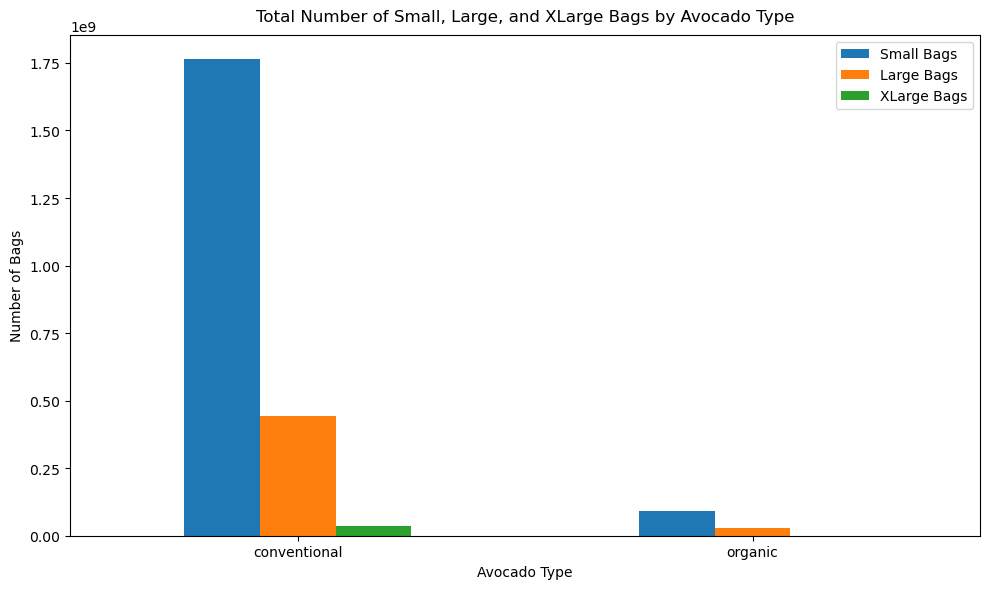

In [7]:
# Filter the data to exclude the specified regions
# Define the excluded regions
excluded_regions = ['TotalUS', 'West', 'NorthEast']

# Filter the data to exclude specified regions
filtered_data = data[data['region'].isin(excluded_regions) == False]
# Group the filtered data by type and calculate the total number of small, large, and extra-large bags
grouped_data = filtered_data.pivot_table(index='type', aggfunc='sum', values=['Small Bags', 'Large Bags', 'XLarge Bags'])

# Reorder the columns for consistency
grouped_data = grouped_data[['Small Bags', 'Large Bags', 'XLarge Bags']]
# Create a bar plot using the grouped data
ax = grouped_data.plot(kind='bar', figsize=(10, 6))

# Customize the plot using matplotlib.pyplot
plt.title('Total Number of Small, Large, and XLarge Bags by Avocado Type', pad=10)
plt.xlabel('Avocado Type')
plt.ylabel('Number of Bags')
plt.xticks(rotation=0)  # Rotate x-axis labels if necessary

# Display the plot
plt.tight_layout()  # Adjust layout to prevent clipping of title or labels
plt.show()

# Set the title and axis labels with appropriate padding

# Display the plot


##### 3. Analyze the avocado data from 2016 to 2018, to identify the top six regions where the sum of the average price of avocados is the highest. Create a visualization containing a grid of subplots, where each subplot is a box plot showing the distribution of average prices of organic and conventional avocados from 2016 to 2018, for the top six regions identified.

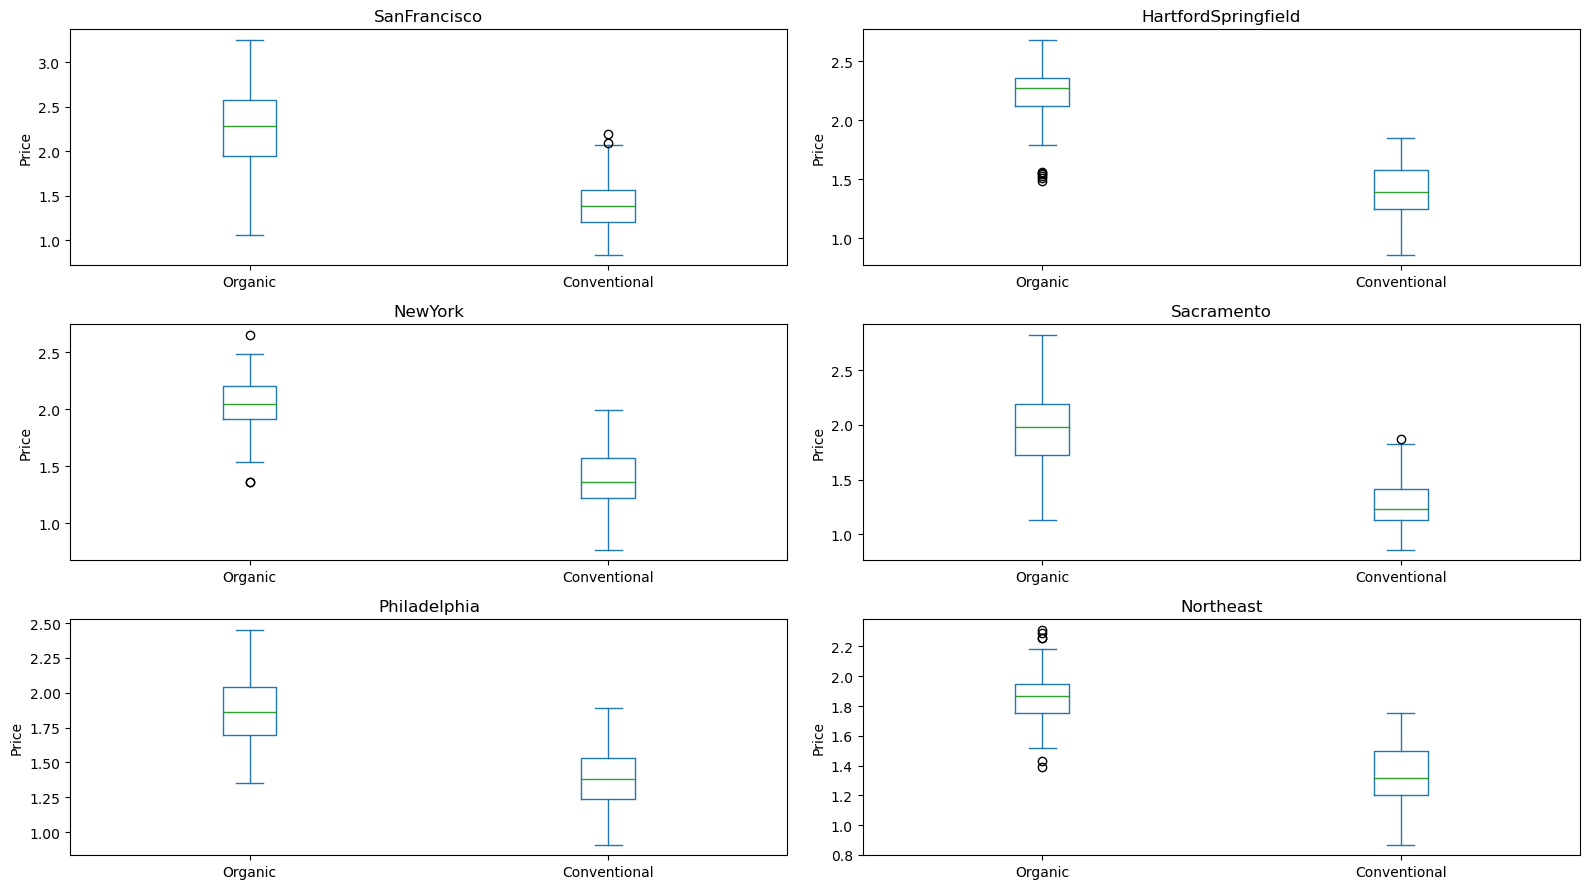

In [18]:
# # Filter the data to include only years 2016 to 2018
data_filtered = data[data['year'].between(2016, 2018)]

# Group the filtered data by region and calculate the sum of average prices for each group
region_price = data_filtered.pivot_table(index='region', values='AveragePrice', aggfunc='sum').rename(columns={'AveragePrice': 'AveragePriceSum'})

# Select the top 6 regions with the highest sum of average prices
top_regions = region_price.sort_values(by='AveragePriceSum', ascending=False).head(6).index.tolist()

# # Filter the data to include only the top 6 regions
# data_top = data[(data['region'].isin(top_regions))]



# Merge the original data with the DataFrame containing the top 6 regions
data_top = pd.merge(data, pd.DataFrame({'region': top_regions}), on='region', how='inner')


# Create separate dataframes for organic and conventional avocados in the top 6 regions
grouped_data_top = data_top.groupby('type')

# Get the DataFrame for organic avocados
organic_avocado_df = grouped_data_top.get_group('organic')

# Get the DataFrame for conventional avocados
conventional_avocado_df = grouped_data_top.get_group('conventional')

# Create a 3x2 grid of subplots
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(16, 9))

# Iterate over the top regions and create box plots
counter = 0  # Initialize counter variable
for region in top_regions:
    if counter < len(axs.ravel()):  # Check if counter exceeds the number of subplots
        organic_region_df = organic_avocado_df.query("region == @region")
        conventional_region_df = conventional_avocado_df.query("region == @region")
        
        region_df = pd.concat([organic_region_df['AveragePrice'], conventional_region_df['AveragePrice']], axis=1)
        region_df.columns =  ['Organic', 'Conventional']
        
        # Get current subplot axes
        ax = axs.ravel()[counter]
        
        # Create box plot on the current subplot
        region_df.plot(kind='box', ax=ax, title=region)
        ax.set_ylabel('Price')
        
        # Increment counter
        counter += 1

# Adjust the layout of the subplots to reduce overlap and show the plot
plt.tight_layout()
plt.show()

# For each of the top 6 regions, create a box plot of the distribution of average prices for organic and conventional avocados
        
# Adjust the layout of the subplots to reduce overlap and show the plot



**The key differences in the approach and usage of different functions between the two codes lie in their strategies for data
manipulation, filtering, and visualization. Code 1 predominantly relies on Pandas functions for these tasks, while Code 2 
integrates both Pandas and Matplotlib functionalities.

**In Code 1, data manipulation begins with filtering out specified regions using boolean indexing. This straightforward 
approach directly filters the DataFrame based on the specified conditions. The pivot_table() function is then employed to 
group the data by avocado type and calculate the total number of bags for each type. This function provides a concise way 
to perform aggregations while reshaping the data into a pivot table format. Following this, Matplotlib's plotting functions
are used directly to create bar plots and box plots. This approach grants fine-grained control over plot customization but 
requires more explicit coding for plot creation and customization.

**On the other hand, Code 2 starts with filtering the data using the isin() function, which efficiently excludes specified 
regions from the dataset. Subsequently, data manipulation continues with grouping by type and calculating bag totals using 
the groupby() function. While similar in outcome to pivot_table(), groupby() offers flexibility in aggregation operations. 
Code 2 then utilizes Pandas' built-in plotting functionality (plot()) for creating both bar plots and box plots. This 
simplifies plot creation by abstracting away some of the complexities of Matplotlib, making it more convenient for quick 
visualizations.

**In summary, Code 1 adopts a more direct approach to data manipulation and visualization, leveraging Pandas for data 
manipulation and Matplotlib for plotting. In contrast, Code 2 integrates Pandas and Matplotlib more seamlessly, utilizing
Pandas functions for data manipulation and plotting, which can streamline the coding process for visualization tasks. Each
approach has its advantages; Code 1 provides more explicit control over plot customization, while Code 2 offers a more 
integrated workflow with Pandas and a simplified interface for plotting.

### C. Learn more

* https://www.youtube.com/watch?v=jb_MvVFZXeU
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/gallery/index.html
* https://plotly.com/python/
* https://www.kaggle.com/code/kanncaa1/plotly-tutorial-for-beginners